In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Default styles
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Set the default font family to Liberation Sans
font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf'
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.sans-serif'] = ['Liberation Sans']

# Reading the dataset

The finalized product categorization is already added.

In [2]:
df = pd.read_csv("shopping_dataset_with_labels.csv")

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Quantity,Avg_Price,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Predicted_Category,cluster
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,...,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,home & kitchen,7.0
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,...,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,home & kitchen,7.0
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,2,122.77,...,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,home & kitchen,7.0
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,1,81.50,...,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,home & kitchen,7.0
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,...,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,home & kitchen,7.0


# Pivot

Bag-of-words representation.

In [3]:
df_cnts = pd.pivot_table(df[['CustomerID', 'Predicted_Category', "Quantity"]]
                        ,index='CustomerID'
                        ,columns = 'Predicted_Category'
                        ,values= "Quantity"
                        ,aggfunc='sum' #size
                        ,fill_value=0)

# If bought from prod category at least once, then 1. Else 0.
for col in df_cnts.columns:
    df_cnts[col] = np.where(df_cnts[col] > 0, 1, 0)
    
df_cnts.head()

Predicted_Category,Caps and Hats,Drinkware,Gift Cards,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,car & motorbike,home & kitchen,office,onesie,pet supplies,sports & fitness
CustomerID,,,,,,,,,,,,,,
12346,0,0,0,0,0,1,0,0,0,0,1,0,0,0
12347,1,1,0,1,1,1,1,0,0,1,1,0,0,1
12348,0,1,0,0,1,1,0,0,0,1,1,0,0,1
12350,1,0,0,0,0,1,0,0,0,1,0,0,0,1
12356,0,1,0,1,1,1,1,1,0,1,1,0,0,1


In [4]:
# Palette

palette = ["#9BA569" # green
           ,"#C1DFDD" # light blue
           ,"#C36A3E" # deep orange
           ,"#EA9D4E" # orange
           ,"#C2706E" # deep red
           ,"#A6A6A6" # gray
           ,"#7798A7" # bluish gray
           ,"#7369a5" # violet
          ]

# 1. Percentage of the customers that bought from a category

In [10]:
pcts = 100 * df_cnts.sum(axis=0) / len(df_cnts.index)

pcts = pd.DataFrame(pcts).round(1)
pcts = pcts.rename(columns={0: "pct_bought"}, index={"Predicted_Category": 'Product Category'})
pcts = pcts.sort_values(by='pct_bought', axis=0, ascending=True)
pcts = pcts.set_index(pcts.index.str.title())
#.sort_values(by=0) #.reset_index(drop=False)
pcts

,pct_bought
Predicted_Category,
Gift Cards,5.2
Onesie,16.1
Car & Motorbike,16.3
Pet Supplies,19.5
Kids Apparel,37.9
Beauty & Health,42.0
Caps And Hats,45.4
Bags & Luggage,47.3
Hoodies And Jackets,50.0


''

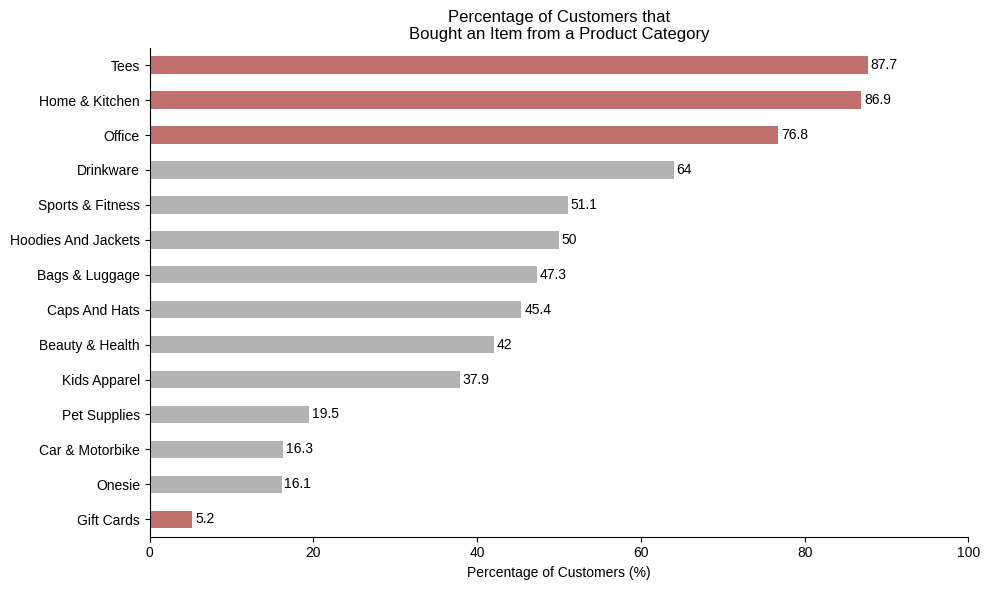

In [22]:
ax = pcts.plot(y="pct_bought", use_index=True, kind="barh", legend=False, figsize=(10, 6))
ax.bar_label(ax.containers[0], padding=2)
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage of Customers (%)")
ax.set_ylabel("")
ax.set_title("Percentage of Customers that\nBought an Item from a Product Category")
ax.spines[['right', 'top']].set_visible(False)

for bar in ax.patches:
    bar.set_facecolor('#b3b3b3')

highlights = ['Tees', "Home & Kitchen", "Office", "Gift Cards"]

# Code from https://stackoverflow.com/questions/20394091/pandas-matplotlib-make-one-color-in-barplot-stand-out
for highlight in highlights:
    pos = pcts.index.get_loc(highlight)
    ax.patches[pos].set_facecolor('#C2706E')
    
fig = plt.gcf()
fig.set_dpi(100) 
fig.tight_layout()
plt.savefig("pct_customers.jpg", dpi=300)
;

Interpretation:

* Around 87.7% of the customers in the dataset bought a Tshirt/s. 
* Around 86.9% bought Home and Kitchen items.

And so on...

# Unique items per category

In [13]:
prod_cnts_category = (
                        df[["Predicted_Category", "Product_Description"]]
                        .groupby("Predicted_Category")
                        .nunique()
                        .rename(columns={"Product_Description": "Num_Unique_Products"})
                        .sort_values(by='Num_Unique_Products', ascending=True)
)

prod_cnts_category = prod_cnts_category.set_index(prod_cnts_category.index.str.title())
prod_cnts_category

,Num_Unique_Products
Predicted_Category,
Pet Supplies,4
Gift Cards,5
Car & Motorbike,5
Beauty & Health,7
Onesie,8
Caps And Hats,20
Home & Kitchen,21
Bags & Luggage,24
Hoodies And Jackets,26


''

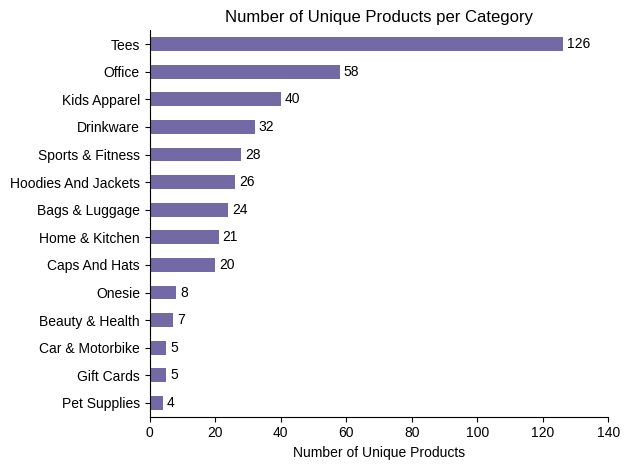

In [23]:
ax = prod_cnts_category.plot(kind="barh", color="#7369a5", legend=False)
ax.bar_label(ax.containers[0], padding=3)
ax.set_xlabel("Number of Unique Products")
ax.set_ylabel("")
ax.set_title("Number of Unique Products per Category")
ax.set_xlim(0, 140)

ax.spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.savefig("num_unique_items.jpg", dpi=300)
;


Tees, Office, and Kids apparel are the top 3 product categories in terms of number of unique products sold.

# Product category median price

In [16]:
df_price = df[['Quantity', 'Avg_Price', "Predicted_Category"]]

# Total amount spent is 
df_price["Total Amount Spent"] = df["Avg_Price"] * df["Quantity"]
df_price_median = (df_price[["Total Amount Spent", "Predicted_Category"]]
                    .groupby("Predicted_Category")
                    .median()
                    .sort_values(by="Total Amount Spent")
                    .rename(columns={"Total Amount Spent": "Median Amount Spent"})
                    .round(2)
                  )
df_price_median = df_price_median.set_index(df_price_median.index.str.title())
df_price_median

/tmp/ipykernel_78684/750031844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["Total Amount Spent"] = df["Avg_Price"] * df["Quantity"]


,Median Amount Spent
Predicted_Category,
Pet Supplies,3.99
Car & Motorbike,5.70
Office,8.38
Caps And Hats,13.29
Kids Apparel,15.19
Tees,15.19
Onesie,19.19
Drinkware,19.99
Sports & Fitness,27.50


''

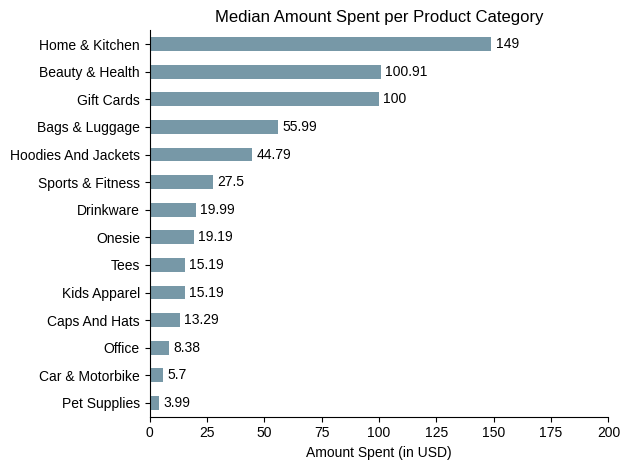

In [25]:
ax = df_price_median.plot(kind="barh"
                            ,legend=False
                            ,title="Median Amount Spent per Product Category"
                            ,xlabel="Amount Spent (in USD)"
                            ,ylabel=""
                            ,color="#7798A7"
                             )
ax.bar_label(ax.containers[0], padding=3)
ax.set_xlim(0, 200)

ax.spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.savefig("amount_spent.jpg", dpi=300)
;

Home and Kitchen is the most expensive product category.